In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
korea_trade_path = os.path.join(os.getcwd(), 'source', 'korea_trade.xls')
world_trade_path = os.path.join(os.getcwd(), 'source', 'world_trade.xls')

In [3]:
korea_df = pd.read_excel(korea_trade_path, header=4, thousands=',')
korea_df = korea_df.drop(0, axis=0)

world_df = pd.read_excel(world_trade_path, header=4, thousands=',')
world_df = world_df.drop(0, axis=0)

In [4]:
print(korea_df.min())
print(world_df.min())

기간          2000.01
수출건수      234821.00
수출금액    11023037.00
수입건수      233344.00
수입금액    10471161.00
무역수지    -4043456.00
dtype: float64
기간       2000.01
국가명           가나
수출건수           0
수출금액           0
수입건수           0
수입금액           0
무역수지    -3841887
dtype: object


In [5]:
print(len(world_df))

54277


In [6]:
condition = world_df[(world_df['수입건수'] <= 1000) & (world_df['수출건수'] <= 1000)].index
world_df = world_df.drop(condition, axis=0)
print(len(world_df))

12439


In [7]:
print(world_df.head())

        기간 국가명   수출건수     수출금액   수입건수     수입금액    무역수지
1  2000.01  미국  45538  2609788  52999  2217025  392763
2  2000.01  일본  35855  1551722  63151  2357231 -805509
3  2000.01  중국  27336  1235215  31458  1008166  227050
4  2000.01  홍콩  19858   782349   5704   110604  671744
5  2000.01  대만   8345   589667  11021   329643  260024


In [8]:
world_df = world_df.sort_values(by='국가명', kind='mergesort')
print(world_df.head())

            기간 국가명  수출건수   수출금액  수입건수  수입금액   무역수지
28630  2011.03  가나  1176  30146    13  1432  28715
28854  2011.04  가나  1072  30060     7   996  29064
29734  2011.08  가나  1027  36631    20  2309  34322
29961  2011.09  가나  1049  27860    12  1112  26748
30183  2011.10  가나  1070  25019    19  3117  21902


In [9]:
countries = list(world_df['국가명'].drop_duplicates())
print(countries)

['가나', '과테말라', '그리스', '기타국', '나이지리아', '남아프리카공화국', '네덜란드', '노르웨이', '뉴질랜드', '대만', '덴마크', '도미니카 공화국', '독일', '러시아 연방', '루마니아', '리비아', '말레이시아', '멕시코', '모로코', '몽골', '미국', '미얀마', '방글라데시', '베트남', '벨기에', '불가리아', '브라질', '사우디아라비아', '스리랑카', '스웨덴', '스위스', '스페인', '슬로바키아', '시리아', '싱가포르', '아랍에미리트 연합', '아르헨티나', '아일랜드', '영국', '예맨', '오만', '오스트리아', '요르단', '우즈베크', '우크라이나', '이라크', '이란', '이스라엘', '이집트', '이탈리아', '인도', '인도네시아', '일본', '중국', '체코공화국', '칠레', '카자흐스탄', '캄보디아', '캐나다', '콜롬비아', '키르기스스탄', '타지크', '태국', '터키', '튀니지', '파나마', '파키스탄', '페루', '포루투갈', '폴란드', '프랑스', '핀란드', '필리핀', '헝가리', '호주', '홍콩']


In [10]:
world_df[world_df['국가명'] == '미국']

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
1,2000.01,미국,45538,2609788,52999,2217025,392763
210,2000.02,미국,44742,2554310,52931,2241520,312790
415,2000.03,미국,52534,2946821,62568,2607380,339441
628,2000.04,미국,48907,2698030,57321,2570158,127872
839,2000.05,미국,53220,3167181,62259,2634243,532939
...,...,...,...,...,...,...,...
53117,2020.03,미국,97081,7290001,1368345,5382555,1907446
53353,2020.04,미국,105344,5278291,1141117,5037504,240787
53587,2020.05,미국,126562,4589466,1157162,4289165,300301
53818,2020.06,미국,121645,5736568,1107616,4588194,1148374


In [11]:
for country in countries:
    print(world_df[world_df['국가명'] == country].head(), '\n\n')

            기간 국가명  수출건수   수출금액  수입건수  수입금액   무역수지
28630  2011.03  가나  1176  30146    13  1432  28715
28854  2011.04  가나  1072  30060     7   996  29064
29734  2011.08  가나  1027  36631    20  2309  34322
29961  2011.09  가나  1049  27860    12  1112  26748
30183  2011.10  가나  1070  25019    19  3117  21902 


           기간   국가명  수출건수   수출금액  수입건수  수입금액   무역수지
453   2000.03  과테말라  1209  45188    59  9141  36047
666   2000.04  과테말라  1191  47462    30  5694  41768
880   2000.05  과테말라  1057  35936    21  3086  32849
1088  2000.06  과테말라  1069  39454    15  2371  37084
1720  2000.09  과테말라  1112  42206    15   183  42024 


           기간  국가명  수출건수    수출금액  수입건수   수입금액    무역수지
4856  2001.12  그리스  1082   54994    86   1042   53952
7331  2002.12  그리스  1038  321629    67   2211  319418
8830  2003.07  그리스  1014   98379    93   1830   96549
9445  2003.10  그리스  1052  188129    92  10584  177545
9863  2003.12  그리스  1116  229814    96   1855  227959 


          기간  국가명  수출건수   수출금액  수입건수  수입금액   무역수지

883  2000.05  스웨덴  1210  34340  1645  46597 -12257 


          기간  국가명  수출건수   수출금액  수입건수   수입금액   무역수지
47   2000.01  스위스   732  29187  2042  70062 -40874
243  2000.02  스위스   651  48041  2289  82554 -34514
469  2000.03  스위스   789  21987  2586  76377 -54389
677  2000.04  스위스   674  27129  2335  77490 -50362
873  2000.05  스위스   775  50946  2664  73923 -22977 


          기간  국가명  수출건수    수출금액  수입건수   수입금액    무역수지
21   2000.01  스페인  2806  120631  1058  18571  102060
225  2000.02  스페인  2584  163487  1092  20523  142965
429  2000.03  스페인  3191  179761  1340  24890  154871
650  2000.04  스페인  2727  129953  1205  22158  107795
859  2000.05  스페인  2633  144253  1222  21614  122640 


            기간    국가명  수출건수    수출금액  수입건수  수입금액    무역수지
11792  2004.09  슬로바키아  1138   39580    53  1564   38016
12003  2004.10  슬로바키아  1398   48961    80  2755   46206
12226  2004.11  슬로바키아  1353   38392    75  2064   36328
14555  2005.10  슬로바키아  1040  143493    87  3972  139521
15843  2006.04  슬로바키아  1027   76561 

            기간     국가명  수출건수   수출금액  수입건수  수입금액   무역수지
19770  2007.10  키르기스스탄  1018  11041     7    75  10965
19984  2007.11  키르기스스탄  1014  12764     5   146  12618
20844  2008.03  키르기스스탄  1036  14608     4    92  14517
21062  2008.04  키르기스스탄  1008  13879     1    18  13860
21277  2008.05  키르기스스탄  1061  13266     1     2  13263 


            기간  국가명  수출건수  수출금액  수입건수  수입금액  무역수지
52539  2019.12  타지크  1035  4412     0     0  4412 


          기간 국가명  수출건수    수출금액  수입건수    수입금액   무역수지
16   2000.01  태국  5628  151252  3019  104524  46728
229  2000.02  태국  5531  145677  2925  107497  38180
432  2000.03  태국  6604  176318  3514  144303  32015
647  2000.04  태국  5575  153280  3156  125065  28215
857  2000.05  태국  6388  164186  3444  125800  38386 


          기간 국가명  수출건수    수출금액  수입건수  수입금액    무역수지
27   2000.01  터키  1161   78650    92  2628   76022
238  2000.02  터키  1336   65541   107  4005   61536
439  2000.03  터키  1620  119438   116  3101  116337
657  2000.04  터키  1577   97702   116  2294   

In [12]:
print(korea_df.head())
print(world_df.head())

        기간    수출건수      수출금액    수입건수      수입금액     무역수지
1  2000.01  258896  12162425  246432  12594623  -432198
2  2000.02  256293  12676042  242907  12023652   652390
3  2000.03  313910  14429703  293016  14212011   217692
4  2000.04  293464  13522040  268239  13344532   177508
5  2000.05  315342  14636755  283452  13283356  1353399
            기간 국가명  수출건수   수출금액  수입건수  수입금액   무역수지
28630  2011.03  가나  1176  30146    13  1432  28715
28854  2011.04  가나  1072  30060     7   996  29064
29734  2011.08  가나  1027  36631    20  2309  34322
29961  2011.09  가나  1049  27860    12  1112  26748
30183  2011.10  가나  1070  25019    19  3117  21902


In [13]:
korea_df = korea_df.drop(['기간'], axis=1)
world_df = world_df.drop(['기간', '국가명'], axis=1)

In [14]:
print(korea_df.head())
print(world_df.head())

     수출건수      수출금액    수입건수      수입금액     무역수지
1  258896  12162425  246432  12594623  -432198
2  256293  12676042  242907  12023652   652390
3  313910  14429703  293016  14212011   217692
4  293464  13522040  268239  13344532   177508
5  315342  14636755  283452  13283356  1353399
       수출건수   수출금액  수입건수  수입금액   무역수지
28630  1176  30146    13  1432  28715
28854  1072  30060     7   996  29064
29734  1027  36631    20  2309  34322
29961  1049  27860    12  1112  26748
30183  1070  25019    19  3117  21902


In [15]:
korea_data = np.array(korea_df, dtype=np.float32)
world_data = np.array(world_df, dtype=np.float32)

In [16]:
print(korea_data.shape, world_data.shape)

(247, 5) (12439, 5)


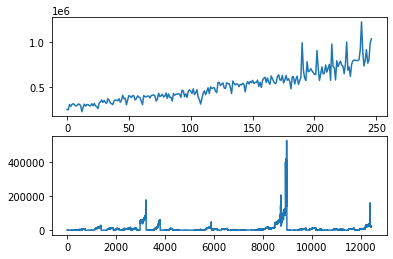

In [17]:
plt.subplot(2, 1, 1)
plt.plot(korea_data[:, 0])

plt.subplot(2, 1, 2)
plt.plot(world_data[:, 0])

plt.show()